# University of Pretoria

## Department of Mechanical and Aeronautical Engineering
### Mechatronics and Control - MBB410 
### Practical 1: Python tutorial

## General Instructions

- Fill in Python code any place that says `# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.`
- Fill in your code for autograding (only Python) right after this line and only in the same cell as this line.
- You may copy cells or insert new cells in order to assist you in debugging your code.  **All copied or new cells, however, must be deleted before the file is finally saved as part of the answer to the assignment.  Failing to do so may crash the autograder and result in a zero mark for this question.**
- You may use `nbtutor` to assist you in debugging your code.  **All code that refer to `nbtutor` should, however, be deleted before the file is finally saved as part of the answer to the assignment.  Failing to do so may crash the autograder and may result in a zero mark for this question.**
- **Do not rename this notebook otherwise the autograder will not grade it.  This may result in a zero mark for this question.**  For example, make sure that no space or a version number like `(2)` is inserted before the `.ipynb` extension of this file.  When students do not perform the upload to clickUP correctly, clickUP adds a version number.  When this happens, you need to correct it.
- If you use any Python functionality/code that was not covered in the MBB 410 module and this functionality/code causes an error during the autograding process, you may lose the marks.
- Before you finally save your notebook file as answer to part of the assignment, make sure everything runs as expected:
  - First, **restart the kernel** (in the menubar, select `Kernel` $\rightarrow$ `Restart`).
  - Second **run all cells** (in the menubar, select `Cell` $\rightarrow$ `Run All`).
- If you cannot get an earlier cell in your notebook to work properly, in the sense that Python interrupts with an error, the autograder will actually try to execute and grade the cells lower down in the notebook, so in such a case ensure that as much as possible of the lower cells run correctly.  This the autograder will do only if your submitted file does not contain new and/or copied cells.  If you do have problems with an erroneous cell that interrupts Python execution early in your notebook file, you can of course test the lower cells on a cell-by-cell basis.
- You may never issue a Python command to clear the global namespace.  If you do, your code cannot be graded and you may get zero for the question.
- All symbols in this test paper have the meaning as used in the textbook or the presentation of the module, unless indicated otherwise.
- Make sure you fill your student number (starting with "u", i.e. replace the "12345678" with your own student number) in the first code cell below.  Your student number with the preceding "u" must be such that Python reads it as a single string.
- Only the following files should be submitted:
  - `MBB410_2022_prac1.ipynb`

## Dataset

To access your dataset, enter your student number (only digits) next to `Student number` in the `Prac1_datasets_release.xlsx` file

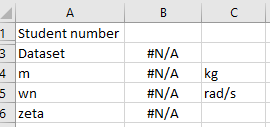

In [1]:
checker1 = True  # Do not change this line.
# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.
STUDENT_NUMBER  = "u18285229"

In [2]:
# Execute this cell to partly test whether the format you used to enter your student number in
#      the cell above is correct.

if checker1:
    try:
        assert STUDENT_NUMBER != "u12345678"
    except AssertionError:
        raise AssertionError("You have not replaced 12345678 with your student number in the cell above.")

try:
    assert type(STUDENT_NUMBER) == str
except AssertionError:
    raise AssertionError("The variable STUDENT_NUMBER is not a string.")

try:
    assert len(STUDENT_NUMBER) == 9
except AssertionError:
    raise AssertionError("The variable STUDENT_NUMBER is not 9 characters long.")
    
try:
    assert STUDENT_NUMBER[0] == 'u'
except AssertionError:
    raise AssertionError("The string variable STUDENT_NUMBER does not start with the character 'u'.")

In [3]:
"""
Do not delete this cell.  It will be used to mark your answer.

"""




'\nDo not delete this cell.  It will be used to mark your answer.\n\n'

### Question 1 (3 marks)
Create a model of a mass-spring-damper system with the mass (`m` in kg), undamped natural frequency (`wn` in rad/s) and damping coefficient (`zeta`) as defined by your dataset, using `b0=1` so that
$$G_{mck}(s)=\frac{\omega_n^2}{s^2+2*\zeta*\omega_n*s+w_n^2}$$

[1] Store the transfer function of the mass-spring-damper system in the variable `Gmck` 

[2] Calculate the damped natural frequency `w` in rad/s

[3] Calculate the poles of Gmck, `poles`

In [3]:
#Question 1 answer cell
%matplotlib notebook

import control
import matplotlib.pyplot as plt
import numpy as np

# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.

m = 2
omega_n = 120
zeta = 0.25

Gmck = control.minreal(control.tf([omega_n**2],[1,2*zeta*omega_n,omega_n**2]))
w = omega_n*(1-zeta**2)**0.5

poles = Gmck.poles()

print('Gmck',Gmck)
print('w,',w)
print('poles',poles)

0 states have been removed from the model
Gmck 
      1.44e+04
---------------------
s^2 + 60 s + 1.44e+04

w, 116.1895003862225
poles [-30.+116.18950039j -30.-116.18950039j]


In [5]:
"""
Do not delete this cell.  It will be used to mark your answer.

"""

'\nDo not delete this cell.  It will be used to mark your answer.\n\n'

### Question 2 (7 marks)

Calculate and plot the response for Gmck with a unit force step.  Using this graph, return the following parameters using the specified variables:

[1] Overshoot, `OS`

[2] Steady-state value, `xss`

[3] Rise time, `tr`

[4] 2% settling time, `ts`

[5] Estimated damping ratio, `zetae`

[6] Estimated damped natural frequency, `we`

[7] Estimated undamped natural frequency, `wne`


<IPython.core.display.Javascript object>


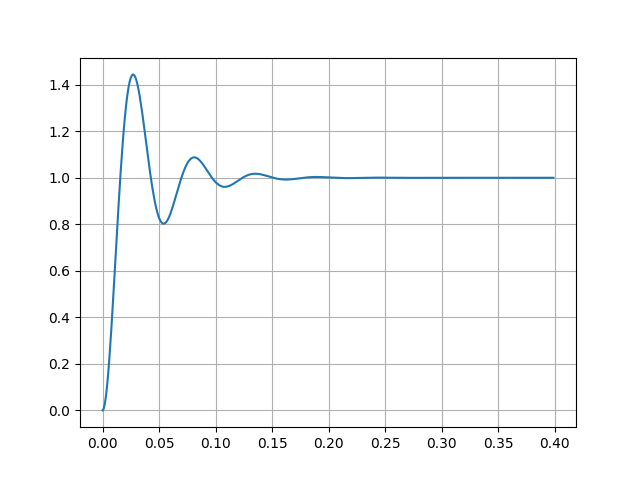

OS 0.44500000000000006
xss, 1
tr, 0.016
ts, 0.13
zetae, 0.25004827507007993
we, 115.92592817674513
wne, 119.72932526906784


In [4]:
# Question 2 answer cell

# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.


T = np.arange(0,0.4,0.001)
t,y = control.step_response(Gmck,T)
#plt.xlim([0.06,0.1])
#plt.ylim([1,1.3])
plt.plot(t,y)
plt.grid()
plt.show()

OS = 1.445-1
xss = 1
tr = 0.016
ts = 0.13  ## recheck

t1 = 0.027
t2 = 0.0812

x1 = 1.44433
x2 = 1.0877

zetae = (1/((2*np.pi/(np.log((x1-xss)/(x2-xss))))**2 + 1))**0.5

we = 2*np.pi/((t2-t1))


wne = we/((1-zetae**2)**0.5)


print('OS',OS)
print('xss,',xss)
print('tr,',tr)
print('ts,',ts)
print('zetae,',zetae)
print('we,',we)
print('wne,',wne)



In [7]:
"""
   This cell is used in the grading of your work; do not delete.
   
"""



'\n   This cell is used in the grading of your work; do not delete.\n   \n'

### Question 3 (2 marks)

Plot the bode diagram of Gmck.  From the bode diagram, determine 

[1] the peak resonance, `Mp`

[2] the -3dB bandwidth, `bw`

<IPython.core.display.Javascript object>


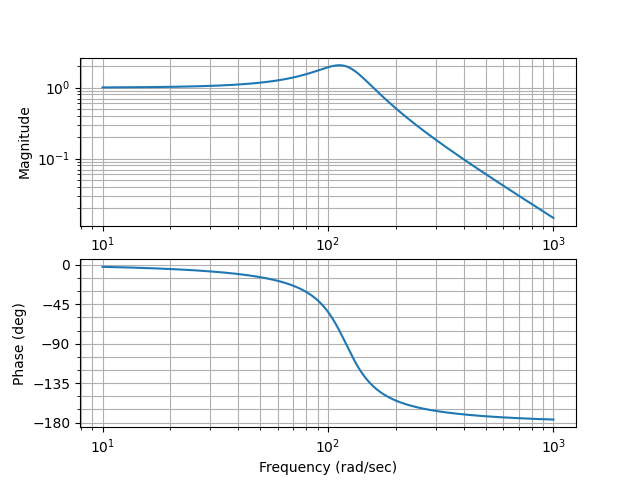

<IPython.core.display.Javascript object>


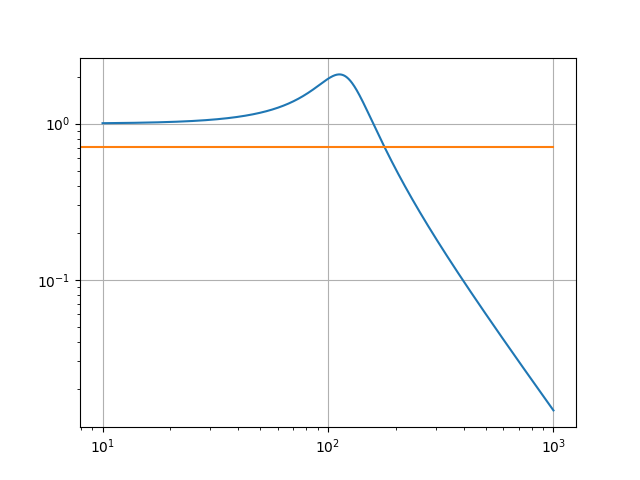

Mp 2.065
bw 178.07


In [5]:
# Question 3 answer cell

# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.
plt.figure()

maf, phase, omega = control.bode(Gmck)

Mp = 2.065


plt.figure()
plt.plot(omega,maf)
plt.plot([0,1000],[10**(-3/20),10**(-3/20)])
plt.loglog()
plt.grid()


bw = 178.07
print('Mp',Mp)
print('bw',bw)


In [9]:
"""
   This cell is used in the grading of your work; do not delete.
   
"""


'\n   This cell is used in the grading of your work; do not delete.\n   \n'

### Question 4 (5 marks)
Using the Process Reaction Method, calculate the gains for a PID controller using `P` = 6% step input.

Return the following variables:

[1] Lag, `L`

[2] Maximum gradient, `R`

[3] Proporsional constant, `Kp`

[4] Integral constant, `Ki`

[5] Derivative constant, `Kd`

In [10]:
# Question 4 answer cell

# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.
from tkinter import Grid


P = 6 ##

px = y*P/100

plt.figure(6)
plt.plot(t,px)

plt.show()

gpx = np.gradient(px,t[1]-t[0])
plt.figure(7)
plt.plot(t,gpx)
plt.grid()
plt.show()


R = 5.1 # read from graph



ii = np.argmax(gpx)


#y = mx + x
c = px[ii] - R*t[ii]

tvec = [t[0],t[ii]*2]
yvec = [R*t[0]+c , R*t[ii*2] + c]



plt.figure(6)
plt.plot(tvec,yvec)
plt.scatter(t[ii],[px[ii]])
plt.grid(True)
#plt.scatter()### intersection point


L = 0.003766 # ms Read from Graph or calculate intersection of tangent in the axsis
### Table 22.1 calculate the porportional constant

Kp = 1.2*P/(R*L)  ## units in percent
Ti = 2*L
Td = 0.5*L
Ki = Kp/Ti
Kd = Kp*Td
plt.show()



print('L,',L)
print('R,',R)
print('Kp,',Kp)
print('Ki,',Ki)
print('Kd,',Kd)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

L, 0.003766
R, 5.1
Kp, 374.8711380462966
Ki, 49770.464424627804
Kd, 0.7058823529411765


In [11]:
"""
   This cell is used in the grading of your work; do not delete.
   
"""


'\n   This cell is used in the grading of your work; do not delete.\n   \n'

### Question 5 (3 marks)

[1] Calculate, and store the transfer function of the closed-loop control loop in the variable `T`

Calculate and plot the response for T with a unit step input. Using this graph, return the following parameters:

[2] Overshoot, `ospid`

[3] 2% settling time, `tspid`


In [12]:
# Question 5 answer cell

# INSERT YOUR CODE FOLLOWING THIS LINE; DO NOT ERASE THIS LINE.


s = control.tf([1,0],[0,1])

PID = Kp + Ki/s + Kd*s
P = control.tf([Kp],[1])
I = control.tf([Ki],[1,0])
D = control.tf([Kd,0],[0,1])

print(PID)
print(P + I + D)

T = control.feedback(PID*Gmck,1,-1)
Gf = PID*Gmck
Tcheck = control.minreal(Gf/(1+Gf*1))

print(T)
print(Tcheck)

tpid, xpid = control.step_response(T,0.5)

plt.figure()
plt.plot(tpid,xpid)
plt.plot(t,y)
plt.grid()
plt.plot([0,0.5],[1.02,1.02])
plt.plot([0,0.5],[0.98,0.98])
### plot the overshoot and time rise settling time


plt.show()


ospid = 1.038-xss  
tspid = 0.00214


print('T,',T)
print('ospid,',ospid)
print('tspid,',tspid)


0.7059 s^2 + 374.9 s + 4.977e+04
--------------------------------
               s


0.7059 s^2 + 374.9 s + 4.977e+04
--------------------------------
               s

3 states have been removed from the model

   1.016e+04 s^2 + 5.398e+06 s + 7.167e+08
---------------------------------------------
s^3 + 1.022e+04 s^2 + 5.413e+06 s + 7.167e+08


   1.016e+04 s^2 + 5.398e+06 s + 7.167e+08
---------------------------------------------
s^3 + 1.022e+04 s^2 + 5.413e+06 s + 7.167e+08



<IPython.core.display.Javascript object>

T, 
   1.016e+04 s^2 + 5.398e+06 s + 7.167e+08
---------------------------------------------
s^3 + 1.022e+04 s^2 + 5.413e+06 s + 7.167e+08

ospid, 0.038000000000000034
tspid, 0.00214


In [13]:
"""
   This cell is used in the grading of your work; do not delete.
   
"""

'\n   This cell is used in the grading of your work; do not delete.\n   \n'